<a href="https://colab.research.google.com/github/yogi05AI/niyata_task_4_titatic/blob/main/niyata_titanic_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/train.csv')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Feature Engineering Function
def preprocess(df, is_train=True):
    df = df.copy()
    # Extract Title from Name
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Mlle', 'Ms', 'Lady'], 'Miss')
    df['Title'] = df['Title'].replace(['Mme', 'Countess'], 'Mrs')
    df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Jonkheer', 'Don', 'Sir'], 'Other')

    # Fill missing values  #These lines were unreachable due to the early return statement. Moved them down.
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

     # Feature Engineering
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

     # Convert categorical features
    df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

     # Drop unnecessary columns
    df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True, errors='ignore')

    #Now, conditionally return the expected number of values
    if is_train:
        return df.drop(columns=['Survived']), df['Survived']
    else:
        return df

In [ ]:
# Preprocess datasets
X, y = preprocess(df_train, is_train=True)
X_test = preprocess(df_test, is_train=False)

<ipython-input-6-68ca281d053a>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-6-68ca281d053a>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
# Ensure test set has the same features as train set
missing_cols = set(X.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X.columns]

In [ ]:
from sklearn.model_selection import train_test_split
# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Model Training - Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
# Hyperparameter Tuning for Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15]}
gs_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
gs_rf.fit(X_train, y_train)
rf_best = gs_rf.best_estimator_

In [ ]:
# Train XGBoost Model
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Train Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=200, max_depth=5, learning_rate=0.05, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=200,
                           random_state=42)

In [ ]:
# Validation Predictions
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

models = {'RandomForest': rf_best, 'XGBoost': xgb_model, 'GradientBoosting': gb_model}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]
    accuracy = accuracy_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_proba)
    report = classification_report(y_val, y_pred)

    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(report)
    print("-" * 50)

    results[name] = {'Accuracy': accuracy, 'ROC-AUC': roc_auc, 'Report': report}

RandomForest Performance:
Accuracy: 0.8212
ROC-AUC: 0.8870
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

--------------------------------------------------
XGBoost Performance:
Accuracy: 0.8212
ROC-AUC: 0.9051
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

--------------------------------------------------
LightGBM Performance:
Accuracy: 0.8268
ROC-AUC: 0.8925
              precision    recall  f1-score   support

           0       0.

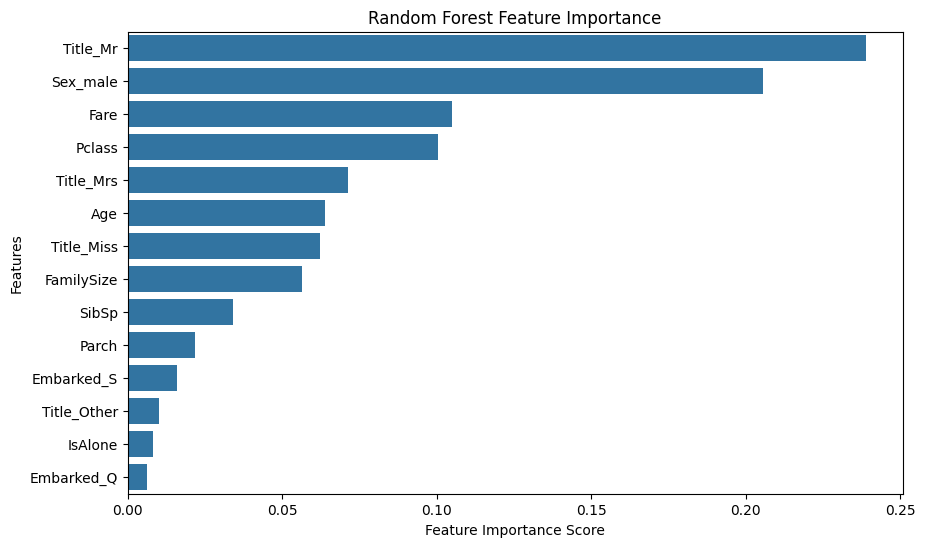

In [ ]:
# Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
importances = pd.Series(rf_best.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=importances, y=importances.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

In [ ]:
# Predict on Test Set
test_predictions = rf_best.predict(X_test)
submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': test_predictions})
submission.to_csv('/content/gender_submission.csv', index=False)
submission.head()

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
